# 实验1：线性回归及岭回归
----------
## 介绍

在本实验中，你将实现线性回归及岭回归并了解其在数据上的工作原理。

本次实验需要用到的数据集包括：

- ex1data1.txt -单变量的线性回归数据集
- ex1data2.txt -多变量的线性回归数据集

评分标准如下：

- [要点1：计算损失](#1)-------------------------------（20分）
- [要点2：单变量线性回归梯度下降](#2)----------（20分）
- [要点3：数据标准化](#3)----------------------------（20分）
- [要点4：多变量线性回归梯度下降](#4)----------（20分）
- [要点5：线性回归闭式解](#5)----------------------（10分）
- [要点6：岭回归闭式解](#6)-------------------------（10分）


## 1 单变量线性回归

在该部分实验中，将实现单变量线性回归并用来预测餐车的利润。

假设你是一家餐厅的领导，正在考虑在不同的城市开设新的分店。该连锁店已经在不同的城市有了餐车，并且你能够获得每个城市的人口和利润数据。

现在需要使用这些数据来帮助你选择下一个被扩展的城市。

文件`ex1data1.txt`包含线性回归问题的数据集。第一列数据对应城市人口，第二列数据对应那座城市的餐车的利润。利润为负时表示亏损。

### 1.1 绘制数据<span id='2'></span>

在开始进入实验之前，对数据进行可视化通常很有用。对于该数据集，可以使用散点图进行可视化，因为它只有两个属性（人口、利润）。

In [69]:
# 引入所需要的库文件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [70]:
# 数据存储路径
path = 'ex1data1.txt'

# 读入相应的数据文件
data = pd.read_csv(path, header=None,names=['Population','Profit'])

#查看数据的前五条
data.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


<AxesSubplot:xlabel='Population', ylabel='Profit'>

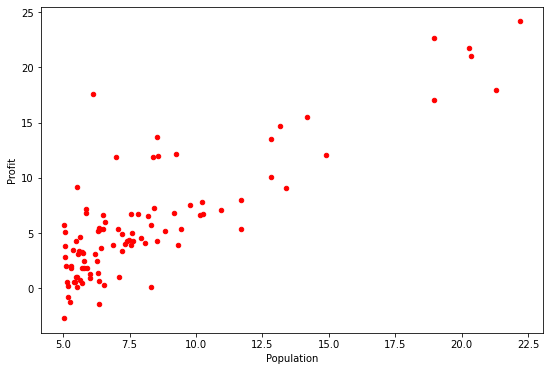

In [71]:
# 数据可视化 
data.plot(kind='scatter', x='Population', y='Profit',c='red', figsize=(9,6))

### 1.2 梯度下降

在该部分中，将使用梯度下降来选择合适的线性回归参数$\mathbf{w}$用以拟合给定数据集。

说明：为编写方便，偏置项$b$可被作为权重向量$\mathbf{w}$的第一个分量$w_0$。

#### 1.2.1 目标函数

线性回归的目的是最小化目标函数：

$$ E(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^m \left( \mathbf{w}^T\mathbf{x}_i - y_i\right)^2$$

其中$\mathbf{w}$为权重参数。上述目标函数也可写成如下矩阵形式：

$$ E(\mathbf{w}) = \frac{1}{2m} \|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2$$

其中矩阵$\mathbf{X}$的第$i$行是$\mathbf{x}_i^T$。 

回顾一下，模型的参数向量是$\mathbf{w}$，这些将用来调整以最小化损失函数$E(\mathbf{w})$。

其中一种方法是使用批量梯度下降算法，在批量梯度下降中，每次迭代地执行更新，随着梯度下降的每一步计算，参数$\mathbf{w}$越来越接近能够使得损失函数$E(\mathbf{w})$达到最低的最佳值。


#### 1.2.2 实现

在上一部分的代码中，我们已经将所需要用到的数据加载至变量`data`中，并为其列分别进行命名。

接下来，我们在数据中添加了一个维度来拟合截距项$w_0$。并将初始参数值设为0，学习率$\alpha$设为0.01。


In [72]:
#在列索引为0处添加数据列，该列值均为1
data.insert(0, 'Ones', 1)

#获取数据列数
cols = data.shape[1]

rows = data.shape[0]

#对变量X和y进行初始化,并将其数据类型转换为矩阵
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)

#学习率、迭代次数的初始化
alpha = 0.01
iterations = 1500

data.head(10)

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233
5,1,8.3829,11.8860
6,1,7.4764,4.3483
7,1,8.5781,12.0000
8,1,6.4862,6.5987
9,1,5.0546,3.8166


# 1.2.3 计算损失函数 $E(\mathbf{w})$<span id='3'></span>

在执行梯度下降最小化成本函数$E(\mathbf{w})$时，通过计算成本来监视收敛状态是有帮助的。

在该部分练习任务中，**你需要实现一个计算损失$E(\mathbf{w})$的函数`computeCost`**，用于检查梯度下降实现的收敛性。

其中，$\mathbf{X}$ 和 $\mathbf{y}$ 不是标量值，而是矩阵，其行代表训练集中的示例。



<div class="alert alert-block alert-warning">

**要点 1：**
完成该函数后，将$\mathbf{w}$值初始化为$\mathbf{0}$并进行损失函数的计算，将得到的损失函数值打印出来。

如果结果为32.07，则计算通过。
</div>

<a id="computeCost"></a>

In [123]:

# ====================== 在这里填入代码 ======================= 
# 打印损失函数
def computeCost(X, y, w):
    ans = np.linalg.norm((X * w - y), ord = 2)
    ans = (ans**2) * (1 / (2 * len(X)))
    
    return ans

w = np.matrix(np.zeros((2,1)))
computeCost(X, y, w)
# ============================================================= 

32.072733877455676

#### 1.2.4 梯度下降<span id='4'></span>

接下来，我们将实现梯度下降，给出的代码已经实现了循环结构，你只需要在每次的迭代中提供$\mathbf{w}$的更新。

在进行代码实现时，请确保你了解要优化的内容，和正在更新的内容。

 
验证梯度下降是否正常工作的一种好方法是查看$E(\mathbf{w})$的值，并检查该值每步是否减小。每次迭代时，代码都会调用`computeCost`函数并打印损失函数值。假设你实现了梯度下降，正确地计算损失，$E(\mathbf{w})$值一般会在算法结束时收敛到稳定值。


<div class="alert alert-block alert-warning">

**要点 2：**

你的任务是实现单变量线性回归的梯度下降。最终的损失函数值应约为4.48。

</div>

<a id="computeCost"></a>

In [125]:

#====================== 在这里填入代码 ======================= 
def gradientDescent(X, y, w, alpha, iters):
    cost = np.zeros(iters)
    
    temp = np.matrix(np.zeros(w.shape))
    parameters = int(w.ravel().shape[1])
    
    for i in range(iters):
        error = (X * w) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[j,0] = w[j,0] - ((alpha / len(X)) * np.sum(term))
            
        w = temp
        cost[i]=computeCost(X,y,w)
    return w, cost
        
##============================================================= 

w_final, cost_final = gradientDescent(X, y, w, alpha, iterations)
# 计算最终的参数所得到的成本值
print('The weight vector:\n',w_final)
computeCost(X, y, w_final)

The weight vector:
 [[-3.63029144]
 [ 1.16636235]]


4.483388256587727

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

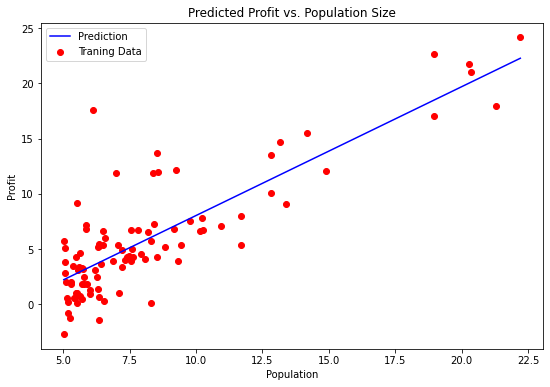

In [95]:
#对拟合曲线进行绘制
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = w_final[0,0] + (w_final[1,0] * x)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x, f, 'b', label='Prediction')
ax.scatter(data.Population, data.Profit, c='red',label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

### 1.3 可视化损失函数

为了更好地理解损失函数的迭代计算，将每一步计算的cost值进行记录并绘制。

Text(0.5, 1.0, 'Error vs. Iterations')

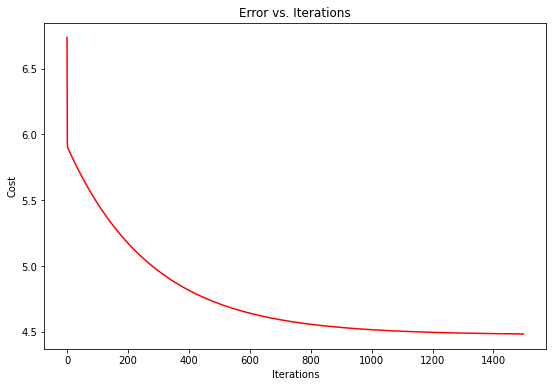

In [85]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iterations), cost_final, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

## 2 多变量线性回归

在该部分中，将使用多个变量来实现用线性回归预测房屋价格。假设你目前正在出售房屋，想知道什么是好的市场价格。

一种方法是首先收集最近出售房屋的信息，其次是建立房屋价格模型。

文件`ex1data2.txt`包含俄勒冈州波特兰市的房屋价格及相关信息。第一列是房屋的大小（以平方英尺为单位），第二列是卧室的个数，第三列是房屋的价格。

### 2.1 特征标准化

以下代码将从文件`ex1data2.txt`文件中加载并显示该数据集。

通过观察这些数据，可以发现房屋的大小大约是卧室数量的1000倍。而当不同的特征值之间相差几个数量级时，将**特征进行缩放可以使梯度下降收敛得更快**。

In [103]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


<span id='5'></span>


<div class="alert alert-block alert-warning">

**要点 3**：

在该部分实验中，你的任务是**编写代码并实现数据集中的数据标准化**。

</div>

<a id="computeCost"></a>

- 从数据集中减去每个特征的平均值。

- 减去平均值后，再将新的特征值除以各自的“标准差”

标准差是一种衡量特定特征的值的范围内有多大变化的方法（大多数数据点将位于平均值的两个标准差内）；这是取值范围的替代方法。

当标准化特征时，需要存储用于标准化的值——平均值和标准差。从模型中学习参数后，经常需要预测新的房屋的价格。此时给定一个新的$x$值（房屋面积和卧室数量），必须首先使用先前从训练集中计算的平均值和标准差来对新的数据进行标准化。

In [104]:
##====================== 在这里填入代码 =======================
data2 = (data2 - data2.mean()) / data2.std()
data2.head()
##============================================================= 

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [105]:
#在列索引为0处添加数据列，该列值均为1
data2.insert(0, 'Ones', 1)

### 2.2 梯度下降<span id='6'></span>

在之前的练习中，我们使用单变量线性回归实现了梯度下降的问题。

<div class="alert alert-block alert-warning">

**要点 4：**

假设函数和批次梯度下降的更新规则保持不变，你的任务是**代码实现多变量线性回归的梯度下降**。最终的损失函数值应大约为0.13。

</div>


 
- 确保你的代码中可以支持任何大小的数据，并且数据均已被向量化。


In [106]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

##====================== 在这里填入代码 ======================= 

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
w2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
w2_final, cost2_final = gradientDescent(X2, y2, w2.T, alpha, iterations)
 
##============================================================= 
# get the cost (error) of the model
print('The weight vector:\n',w2_final)
computeCost(X2, y2, w2_final)

The weight vector:
 [[-1.10845139e-16]
 [ 8.84042349e-01]
 [-5.24551809e-02]]


0.130686706060959

Text(0.5, 1.0, 'Error vs. Iterations')

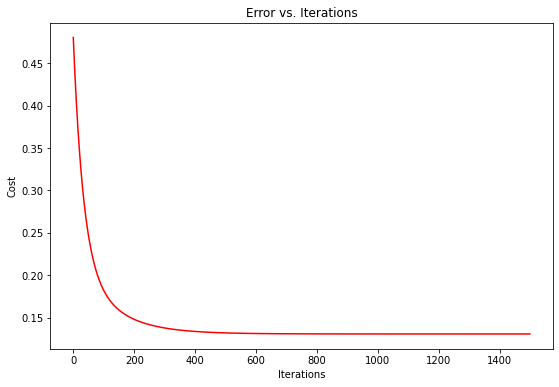

In [107]:
#可视化损失函数
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iterations), cost2_final, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

### 2.3 闭式解<span id='6'></span>

通过令损失函数关于w的梯度为0，可得到线性回归原问题的闭式解

$$ \mathbf{w}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

梯度下降与闭式解的比较：

梯度下降：需要选择学习率$\alpha$，需要多次迭代

闭式解：不需要选择学习率$\alpha$，一次计算得出；但是需要计算矩阵的逆，当样本数量$n$较大时运算代价较大

<div class="alert alert-block alert-warning">

**要点 5：**

你的任务是**代码实现多变量线性回归的闭式解**。

</div>

In [108]:
###线性回归闭式解###
def LinearRegression(X, y):
##====================== 在这里填入代码 ======================= 
    w3 = np.linalg.inv((X.T * X)) * X.T * y
##============================================================= 
    return w3

In [120]:
w3_final=LinearRegression(X2, y2)#这里用的是data2的数据
print('The weight vector:\n',w3_final)


The weight vector:
 [[-1.11022302e-16]
 [ 8.84765988e-01]
 [-5.31788197e-02]]


## 3 岭回归 (Ridge Regression)

为提升线性回归模型的稳定性，可考虑如下岭回归(Ridge Regression)模型（有时也被称为脊回归模型）

$$E(\mathbf{w}) = \|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2+\lambda\|\mathbf{w}\|_2^2$$

其中$\lambda$为正则化参数，为非负数。上述模型的闭式解为

$$ \mathbf{w}= (\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}$$

<div class="alert alert-block alert-warning">

**要点 6：**

你的任务是**代码实现岭回归的闭式解**。

</div>

In [118]:
###岭回归闭式解###
def RidgeRegression(X, y, lam):
    ##====================== 在这里填入代码 ======================= 
    num = (X.T * X).shape[0]
    w4 = np.linalg.inv(X.T * X + lam * np.identity(num)) * X.T * y
    ##======================================= =====================
    return w4

In [119]:
w4_final=RidgeRegression(X2, y2,0.01) #这里用的是data2的数据
print('The weight vector:\n',w4_final)

The weight vector:
 [[-1.17961196e-16]
 [ 8.84476478e-01]
 [-5.30051810e-02]]
